In [158]:
## Import libraries which is needed!
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score

In [2]:
!conda install -c conda-forge scikit-plot -y

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
import scikitplot as skplt

In [159]:
train = pd.read_csv("Employee-Attrition-Rate/Dataset/Train.csv")

In [160]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [161]:
test = pd.read_csv("Employee-Attrition-Rate/Dataset/Test.csv")

In [162]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [163]:
submission = pd.read_csv("Employee-Attrition-Rate/Dataset/sample_submission.csv")

In [164]:
submission

,Employee_ID,Attrition_rate
0,TID_1,0.1588
1,TID_2,0.1424
2,TID_3,0.4758
3,TID_4,0.0846
4,TID_5,0.2388


Decriptive Analytics

In [165]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [166]:
train.shape, test.shape

((7000, 24), (3000, 23))

In [167]:
train.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [168]:
test.isna().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [169]:
data = pd.concat([train,test])

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                10000 non-null  object 
 1   Gender                     10000 non-null  object 
 2   Age                        9427 non-null   float64
 3   Education_Level            10000 non-null  int64  
 4   Relationship_Status        10000 non-null  object 
 5   Hometown                   10000 non-null  object 
 6   Unit                       10000 non-null  object 
 7   Decision_skill_possess     10000 non-null  object 
 8   Time_of_service            9804 non-null   float64
 9   Time_since_promotion       10000 non-null  int64  
 10  growth_rate                10000 non-null  int64  
 11  Travel_Rate                10000 non-null  int64  
 12  Post_Level                 10000 non-null  int64  
 13  Pay_Scale                  9988 non-null   floa

In [171]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9427.0,39.675507,13.574856,19.0000,27.0000,38.00000,52.0000,65.0000
Education_Level,10000.0,3.199400,1.065436,1.0000,3.0000,3.00000,4.0000,5.0000
Time_of_service,9804.0,13.390657,10.311381,0.0000,5.0000,10.00000,21.0000,43.0000
Time_since_promotion,10000.0,2.378600,1.149780,0.0000,1.0000,2.00000,3.0000,4.0000
growth_rate,10000.0,47.008400,15.848553,20.0000,33.0000,47.00000,61.0000,74.0000
Travel_Rate,10000.0,0.820700,0.646524,0.0000,0.0000,1.00000,1.0000,2.0000
Post_Level,10000.0,2.797000,1.171037,1.0000,2.0000,3.00000,4.0000,5.0000
Pay_Scale,9988.0,6.022627,2.070087,1.0000,5.0000,6.00000,8.0000,10.0000
Work_Life_balance,9984.0,2.385817,1.128782,1.0000,1.0000,2.00000,3.0000,5.0000
VAR1,10000.0,3.089100,0.831884,1.0000,3.0000,3.00000,3.0000,5.0000


In [172]:
data.duplicated().sum()

0

In [173]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
2996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
2997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [174]:
data = data.reset_index(drop=True)

In [175]:
data

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4,NaN
9996,EID_10066,F,NaN,2,Single,Franklin,Marketing,Conceptual,10.0,2,...,type2,1.0,3,0.7516,0.7075,3.0,4,8,3,NaN
9997,EID_7126,F,60.0,4,Single,Lebanon,Logistics,Analytical,35.0,1,...,type3,3.0,3,-1.8176,-0.4537,NaN,4,8,4,NaN
9998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2,NaN


In [176]:
data.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.019583,0.917295,0.160433,-0.000487,0.010592,-0.012755,0.008032,0.000100,0.000669,0.006181,0.005103,-0.001340,-0.002263,-0.002986,0.003758,-0.015498
Education_Level,-0.019583,1.000000,-0.023769,-0.004403,0.004248,-0.018508,0.003910,0.001540,-0.007092,-0.000978,-0.011788,-0.012551,-0.006163,0.002439,0.002964,0.010247,-0.008143
Time_of_service,0.917295,-0.023769,1.000000,0.146848,-0.004935,0.009064,-0.014277,0.011298,-0.002006,-0.000426,0.006772,0.003769,-0.004993,0.004655,-0.001055,-0.000987,-0.016447
Time_since_promotion,0.160433,-0.004403,0.146848,1.000000,0.000572,-0.014822,-0.008798,-0.002681,-0.002505,-0.005158,0.006634,0.001299,-0.009633,-0.002644,0.001764,0.000285,0.013880
growth_rate,-0.000487,0.004248,-0.004935,0.000572,1.000000,0.008024,-0.008832,0.001850,-0.014718,-0.013294,0.000886,0.007201,0.029691,-0.006268,-0.008025,-0.013571,0.014247
Travel_Rate,0.010592,-0.018508,0.009064,-0.014822,0.008024,1.000000,0.011363,-0.006102,-0.001753,0.010926,0.002904,-0.008601,0.001686,-0.004150,-0.009697,0.006319,-0.012608
Post_Level,-0.012755,0.003910,-0.014277,-0.008798,-0.008832,0.011363,1.000000,0.024410,-0.002089,-0.006378,-0.007658,0.008104,-0.005878,0.002695,-0.000051,-0.005792,0.016402
Pay_Scale,0.008032,0.001540,0.011298,-0.002681,0.001850,-0.006102,0.024410,1.000000,-0.029594,0.012256,0.008507,-0.002106,-0.001622,0.007738,-0.011612,-0.002655,-0.015236
Work_Life_balance,0.000100,-0.007092,-0.002006,-0.002505,-0.014718,-0.001753,-0.002089,-0.029594,1.000000,-0.014009,-0.002449,0.000670,-0.011015,0.025167,0.001128,0.025743,0.020746
VAR1,0.000669,-0.000978,-0.000426,-0.005158,-0.013294,0.010926,-0.006378,0.012256,-0.014009,1.000000,-0.000057,0.002303,0.011319,-0.001639,-0.010254,0.007538,-0.008073


In [177]:
matplotlib.rcParams["figure.figsize"] = (20,30)

<AxesSubplot:>

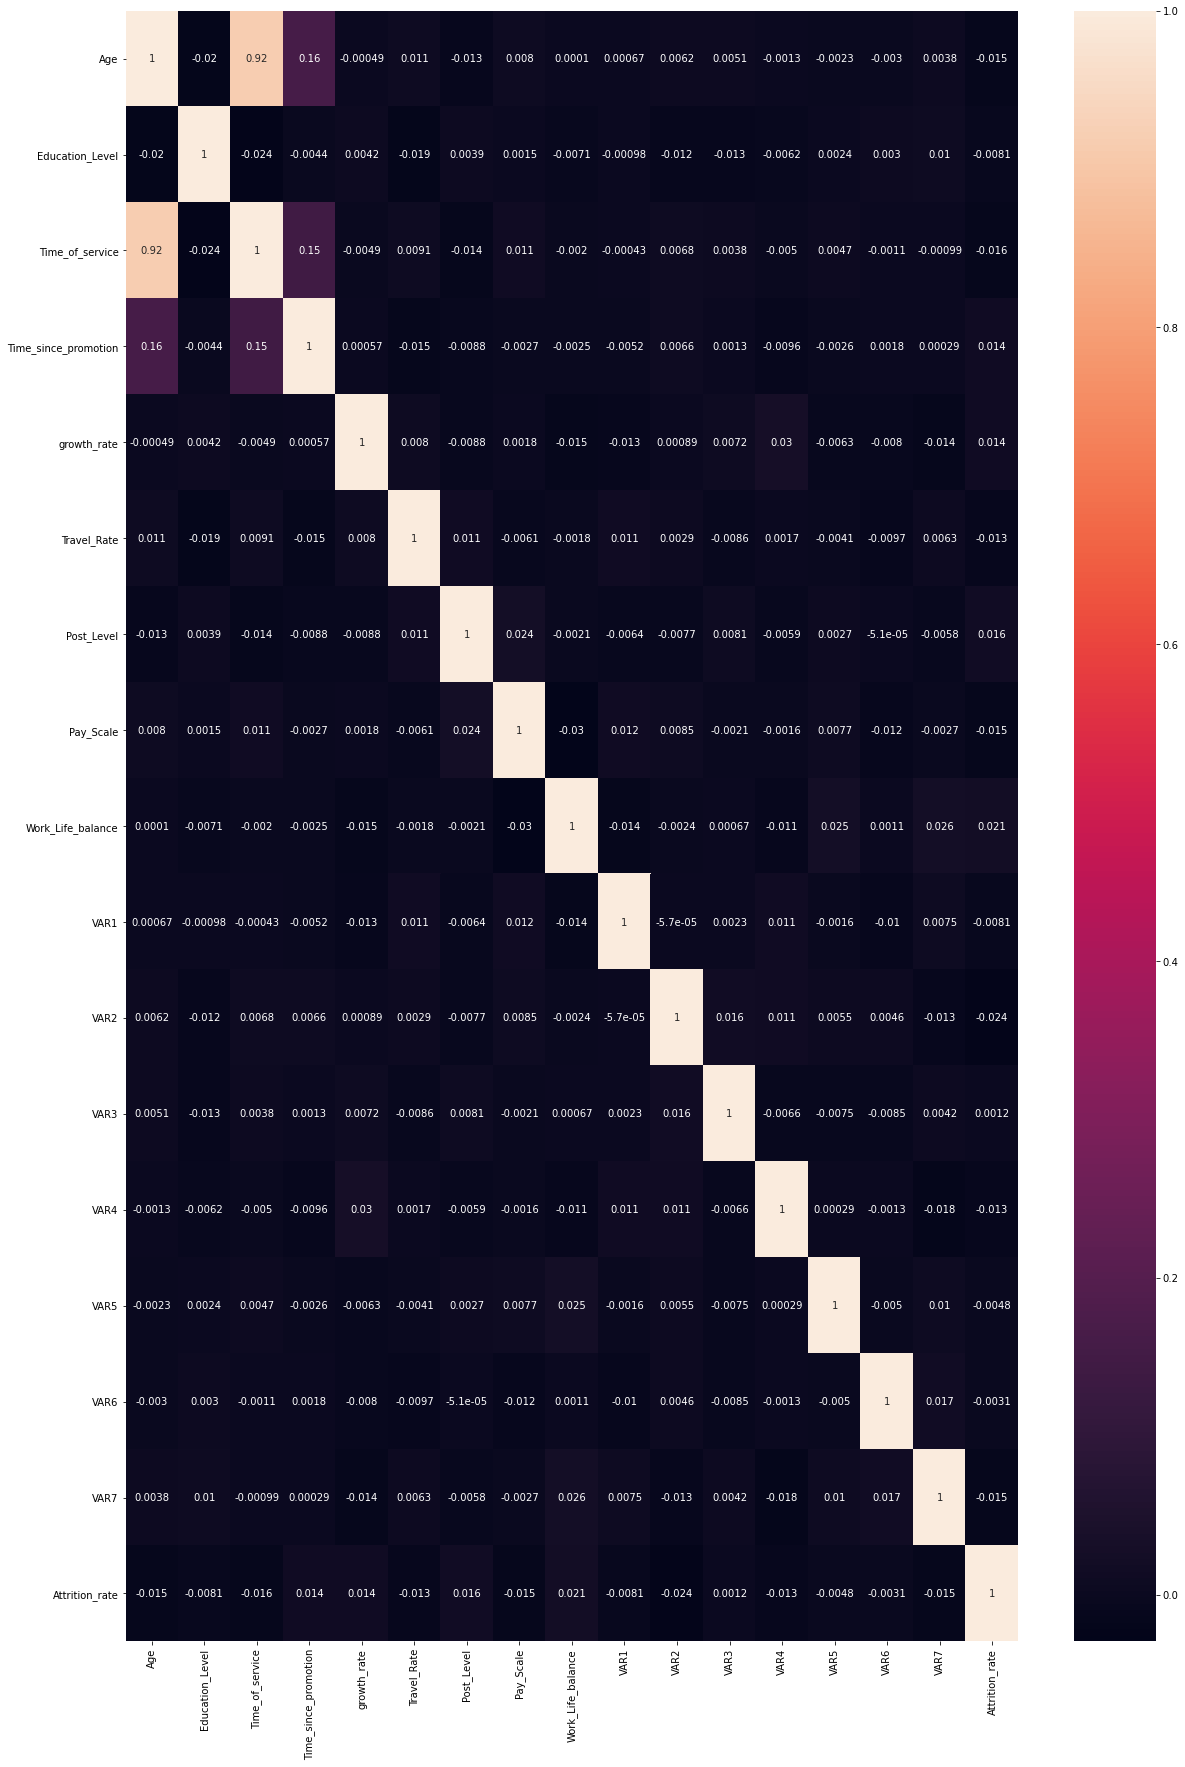

In [29]:
sns.heatmap(data.corr(), annot=True,)

In [178]:
data.Attrition_rate.value_counts()

0.1042    10
0.1294     9
0.0312     9
0.1506     8
0.0015     8
          ..
0.4958     1
0.0699     1
0.3687     1
0.2768     1
0.2583     1
Name: Attrition_rate, Length: 3317, dtype: int64

In [23]:
trans = MinMaxScaler()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition_rate', ylabel='count'>

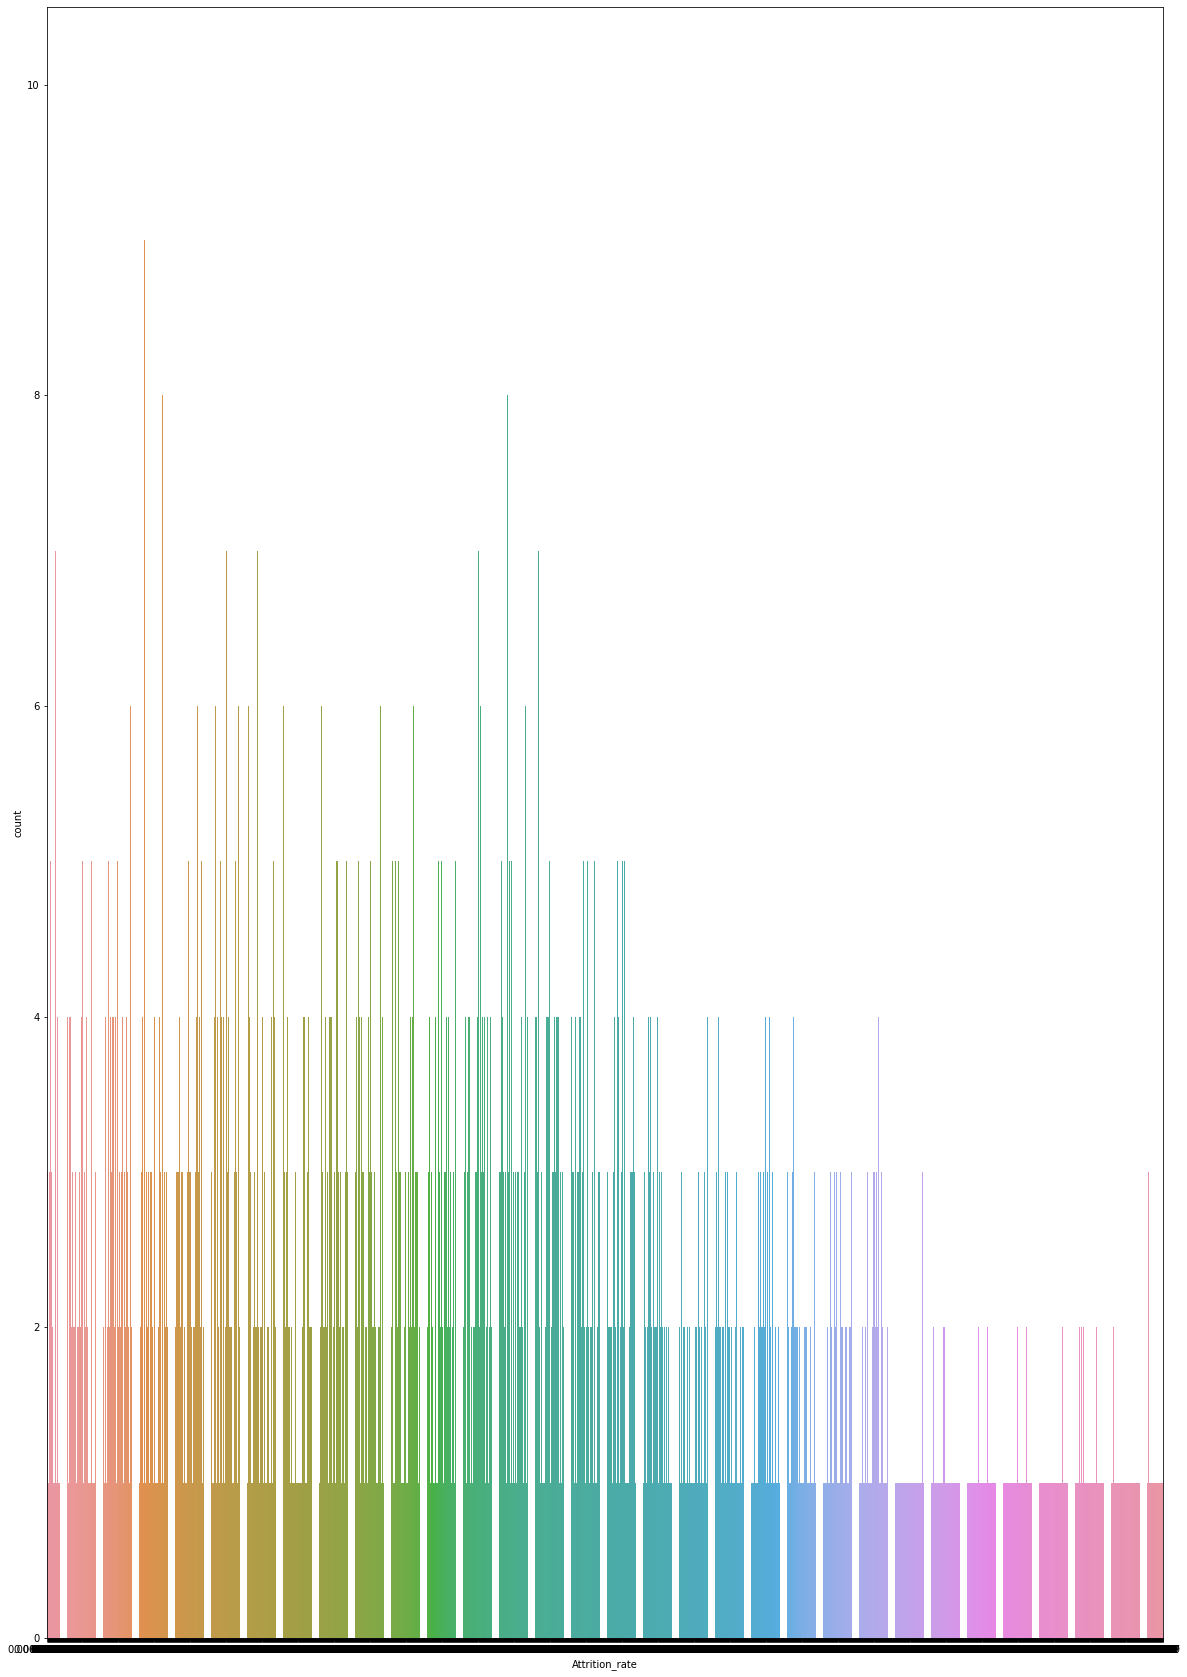

In [34]:
sns.countplot(data.Attrition_rate)

In [24]:
data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#EDA
Exploratory Data Analysis

###Exploratory Data Analysis

In [36]:
matplotlib.rcParams["figure.figsize"] = (10,10)

<AxesSubplot:ylabel='Frequency'>

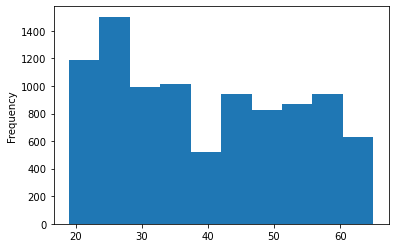

In [25]:
data["Age"].plot(kind = 'hist')

In [38]:
data.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

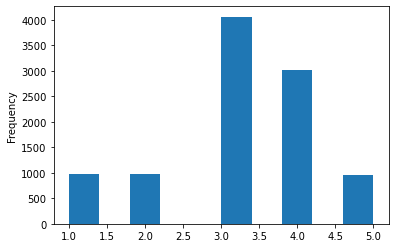

In [26]:
data["Education_Level"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

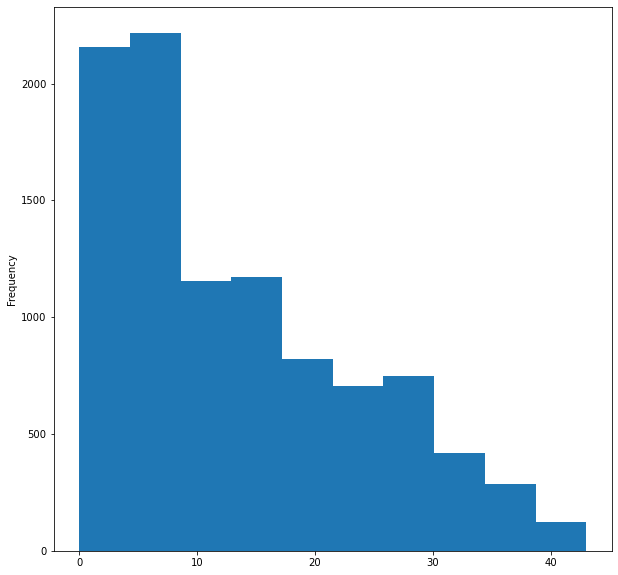

In [41]:
data["Time_of_service"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

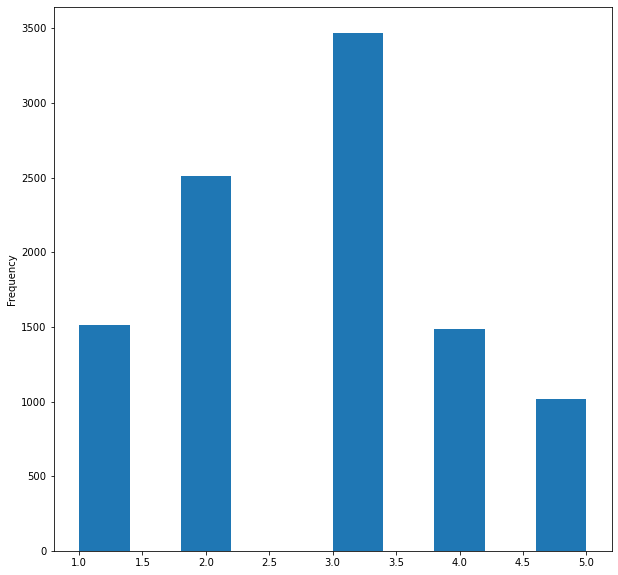

In [44]:
data["Post_Level"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

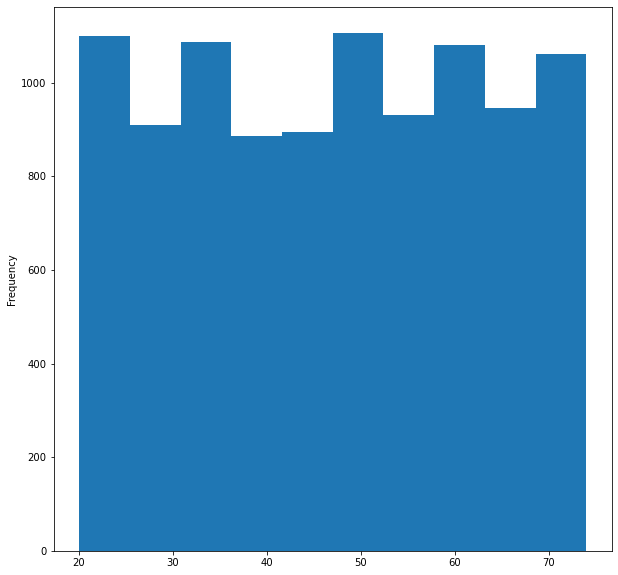

In [43]:
data["growth_rate"].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

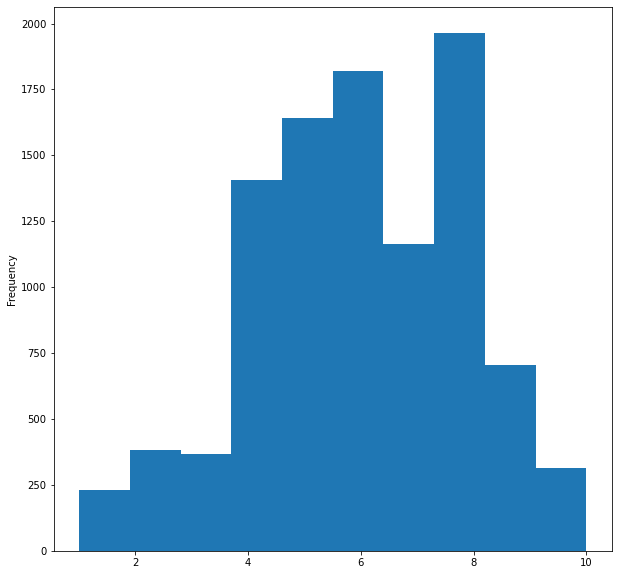

In [45]:
data["Pay_Scale"].plot(kind = 'hist')

In [33]:
pd.crosstab(data["Relationship_Status"],data['Attrition_rate']).plot(kind = "bar")

<AxesSubplot:xlabel='Relationship_Status'>

Error in callback <function flush_figures at 0x0000022839CBDE50> (for post_execute):


KeyboardInterrupt: 

In [48]:
pd.crosstab(data["Time_of_service"],data['Attrition_rate']).plot(kind = "bar")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D5AF97CE50> (for post_execute):


KeyboardInterrupt: 

In [27]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                           573
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [179]:
data["Age"].value_counts()

22.0    347
27.0    336
25.0    320
26.0    305
54.0    304
37.0    302
60.0    300
52.0    299
35.0    288
30.0    286
31.0    283
42.0    277
28.0    277
45.0    274
47.0    270
32.0    270
24.0    264
21.0    242
65.0    213
19.0    213
23.0    208
59.0    194
20.0    176
58.0    170
50.0    156
29.0    154
33.0    145
51.0    142
41.0    141
34.0    140
56.0    140
36.0    138
43.0    137
49.0    137
57.0    136
38.0    135
55.0    135
53.0    133
46.0    132
64.0    125
44.0    123
40.0    123
48.0    122
39.0    120
63.0    103
62.0    101
61.0     91
Name: Age, dtype: int64

In [180]:
data["Age"].fillna(data['Age'].mean(), inplace=True)

In [181]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service               196
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [182]:
data["Time_of_service"].fillna(data['Time_of_service'].mode()[0], inplace=True)

In [183]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                      12
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [184]:
data.groupby('Time_of_service').Pay_Scale

In [185]:
import scipy
data.pivot_table(values="Time_of_service", index = "Pay_Scale",aggfunc = scipy.stats.mode)

,Time_of_service
Pay_Scale,
1.0,"([6.0], [26])"
2.0,"([6.0], [33])"
3.0,"([6.0], [36])"
4.0,"([6.0], [130])"
5.0,"([6.0], [162])"
6.0,"([6.0], [168])"
7.0,"([6.0], [108])"
8.0,"([6.0], [183])"
9.0,"([6.0], [75])"


In [186]:
data['Time_of_service'].value_counts()

6.0     951
5.0     700
3.0     687
4.0     653
2.0     415
8.0     385
7.0     376
10.0    327
12.0    290
9.0     280
13.0    275
11.0    258
14.0    244
15.0    242
16.0    231
0.0     222
18.0    220
20.0    209
21.0    208
22.0    191
19.0    183
23.0    182
1.0     181
17.0    180
24.0    169
26.0    165
25.0    165
27.0    159
28.0    156
30.0    147
29.0    122
31.0    118
32.0    106
33.0    102
34.0     93
35.0     79
36.0     79
37.0     70
38.0     58
39.0     36
40.0     32
41.0     24
42.0     21
43.0      9
Name: Time_of_service, dtype: int64

In [187]:
data.groupby(["Time_of_service"]).Pay_Scale.median()[0]

6.0

In [188]:
data.Pay_Scale.fillna(data.groupby(["Time_of_service"]).Pay_Scale.median()[0], inplace=True)

In [189]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance              16
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [190]:
data.groupby(["Decision_skill_possess"]).Work_Life_balance.mean()

Decision_skill_possess
Analytical    2.402161
Behavioral    2.366693
Conceptual    2.384864
Directive     2.389783
Name: Work_Life_balance, dtype: float64

In [191]:
data.groupby(["Time_since_promotion"]).Work_Life_balance.mean()[0]

2.388392857142857

In [192]:
data.groupby(["growth_rate"]).Work_Life_balance.mean()

growth_rate
20    2.411429
21    2.464481
22    2.339080
23    2.480392
24    2.365591
25    2.439306
26    2.430380
27    2.402062
28    2.362069
29    2.439791
30    2.305263
31    2.322222
32    2.433673
33    2.430168
34    2.374359
35    2.304348
36    2.426136
37    2.433155
38    2.481928
39    2.376344
40    2.418605
41    2.344828
42    2.391534
43    2.440476
44    2.242775
45    2.430052
46    2.325444
47    2.474684
48    2.362162
49    2.418478
50    2.551351
51    2.339806
52    2.251337
53    2.374233
54    2.421320
55    2.458101
56    2.410000
57    2.434555
58    2.415301
59    2.371859
60    2.338624
61    2.230769
62    2.263473
63    2.512658
64    2.323671
65    2.447368
66    2.465686
67    2.289617
68    2.489899
69    2.406780
70    2.311224
71    2.337209
72    2.350282
73    2.229508
74    2.320513
Name: Work_Life_balance, dtype: float64

In [193]:
data.groupby(["Age"]).Work_Life_balance.median()

Age
19.000000    2.0
20.000000    3.0
21.000000    2.0
22.000000    2.0
23.000000    2.0
24.000000    2.0
25.000000    2.0
26.000000    2.0
27.000000    3.0
28.000000    2.0
29.000000    2.0
30.000000    2.0
31.000000    2.0
32.000000    2.0
33.000000    2.0
34.000000    2.0
35.000000    3.0
36.000000    2.0
37.000000    2.0
38.000000    2.0
39.000000    3.0
39.675507    2.0
40.000000    2.0
41.000000    3.0
42.000000    2.0
43.000000    2.5
44.000000    2.0
45.000000    2.0
46.000000    2.0
47.000000    2.0
48.000000    2.0
49.000000    3.0
50.000000    2.0
51.000000    2.0
52.000000    2.0
53.000000    2.0
54.000000    2.0
55.000000    2.0
56.000000    2.0
57.000000    2.0
58.000000    2.5
59.000000    2.0
60.000000    2.0
61.000000    2.0
62.000000    2.0
63.000000    3.0
64.000000    3.0
65.000000    2.0
Name: Work_Life_balance, dtype: float64

In [194]:
data.groupby(["Gender"]).Work_Life_balance.mean()

Gender
F    2.391185
M    2.378281
Name: Work_Life_balance, dtype: float64

In [195]:
data.Gender.value_counts()

F    5842
M    4158
Name: Gender, dtype: int64

In [196]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [212]:
data["Gender"].replace({'F':1, 'M': 0 }, inplace=True)

In [198]:
data.Work_Life_balance.fillna(data.groupby(["Time_since_promotion"]).Work_Life_balance.mean()[0], inplace=True)

In [199]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                          794
VAR3                            0
VAR4                          954
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [200]:
data.groupby(["Time_of_service"]).VAR2.median()[0]

-0.1048

In [201]:
data.VAR2.fillna(data.groupby(["Time_of_service"]).VAR2.median()[0], inplace=True)

In [202]:
data.groupby(["Time_of_service"]).VAR4.median()[0]

2.0

In [203]:
data.VAR4.fillna(data.groupby(["Time_of_service"]).VAR4.median()[0], inplace=True)

In [204]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [205]:
data.Relationship_Status.value_counts()

Married    6461
Single     3539
Name: Relationship_Status, dtype: int64

In [206]:
data["Relationship_Status"].replace({'Married':1, 'Single': 0 }, inplace=True)

In [207]:
data.Decision_skill_possess.value_counts()

Behavioral    2535
Analytical    2501
Directive     2488
Conceptual    2476
Name: Decision_skill_possess, dtype: int64

In [213]:
num_col = data.select_dtypes(include=np.number).columns

In [214]:
num_col

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3',
       'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

In [215]:
cat_col = data.select_dtypes(exclude=np.number).drop(columns=['Employee_ID']).columns

In [216]:
cat_col

Index(['Hometown', 'Unit', 'Decision_skill_possess',
       'Compensation_and_Benefits'],
      dtype='object')

In [217]:
data.Compensation_and_Benefits.value_counts()

type2    5686
type3    3346
type4     490
type0     280
type1     198
Name: Compensation_and_Benefits, dtype: int64

In [218]:
num_col

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3',
       'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

In [219]:
cat_col

Index(['Hometown', 'Unit', 'Decision_skill_possess',
       'Compensation_and_Benefits'],
      dtype='object')

In [220]:
cat_col_tranform = pd.get_dummies(data[cat_col])

In [221]:
data.isna().sum()

Employee_ID                     0
Gender                          0
Age                             0
Education_Level                 0
Relationship_Status             0
Hometown                        0
Unit                            0
Decision_skill_possess          0
Time_of_service                 0
Time_since_promotion            0
growth_rate                     0
Travel_Rate                     0
Post_Level                      0
Pay_Scale                       0
Compensation_and_Benefits       0
Work_Life_balance               0
VAR1                            0
VAR2                            0
VAR3                            0
VAR4                            0
VAR5                            0
VAR6                            0
VAR7                            0
Attrition_rate               3000
dtype: int64

In [223]:
data_preprocessed_cat_num = pd.concat([cat_col_tranform, data[num_col]], axis = 1)

In [224]:
train_preprocessd = data_preprocessed_cat_num.dropna(subset=["Attrition_rate"])

In [236]:
test_preprocessd = data_preprocessed_cat_num[data_preprocessed_cat_num["Attrition_rate"].isna()]

In [237]:
test_preprocessd = test_preprocessd.drop(columns="Attrition_rate")

In [270]:
test_preprocessd = test_preprocessd.reset_index(drop=True)

In [239]:
for col in train_preprocessd.columns:
    train_preprocessd[col] = train_preprocessd[col].apply(lambda x: int(x))

<ipython-input-239-05c117265650>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessd[col] = train_preprocessd[col].apply(lambda x: int(x))


In [240]:
train_preprocessd

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,1,0,0,0,0,0,1,0,0,...,7,3,4,0,1,2,4,5,3,0
1,0,0,0,1,0,0,0,0,1,0,...,6,4,3,0,0,2,3,5,3,0
2,1,0,0,0,0,0,0,0,0,0,...,8,1,4,0,0,3,3,8,3,0
3,0,0,1,0,0,0,1,0,0,0,...,8,1,3,-1,0,2,3,7,3,0
4,0,0,0,1,0,0,0,0,1,0,...,2,3,1,0,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,6,3,1,0,0,2,3,7,3,0
6996,0,0,1,0,0,0,0,0,0,0,...,4,3,2,0,-2,2,4,8,4,0
6997,0,0,0,1,0,0,0,1,0,0,...,3,4,2,0,0,2,4,8,3,0
6998,0,0,0,0,1,0,0,0,0,0,...,8,2,4,0,1,2,3,6,3,0


In [241]:
for col in test_preprocessd.columns:
    test_preprocessd[col] = test_preprocessd[col].apply(lambda x: int(x))

In [242]:
train_preprocessd

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,1,0,0,0,0,0,1,0,0,...,7,3,4,0,1,2,4,5,3,0
1,0,0,0,1,0,0,0,0,1,0,...,6,4,3,0,0,2,3,5,3,0
2,1,0,0,0,0,0,0,0,0,0,...,8,1,4,0,0,3,3,8,3,0
3,0,0,1,0,0,0,1,0,0,0,...,8,1,3,-1,0,2,3,7,3,0
4,0,0,0,1,0,0,0,0,1,0,...,2,3,1,0,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,6,3,1,0,0,2,3,7,3,0
6996,0,0,1,0,0,0,0,0,0,0,...,4,3,2,0,-2,2,4,8,4,0
6997,0,0,0,1,0,0,0,1,0,0,...,3,4,2,0,0,2,4,8,3,0
6998,0,0,0,0,1,0,0,0,0,0,...,8,2,4,0,1,2,3,6,3,0


In [230]:
for col in num_col:
    train_preprocessd[col] = train_preprocessd[col].apply(lambda x: x.asType('int64'))

AttributeError: 'int' object has no attribute 'asType'

In [243]:
X = train_preprocessd.drop(columns=["Attrition_rate"])

In [254]:
y = train["Attrition_rate"]

In [257]:
y = np.where(y > 0.3, 1, 0)

In [258]:
logistic_model.fit(X, y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [251]:
logistic_model = LogisticRegression()

In [252]:
logistic_model.fit(X,y)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [155]:
train_preprocessd

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,1,0,0,0,0,0,1,0,0,...,7,3,4,0,1,2,4,5,3,0
1,0,0,0,1,0,0,0,0,1,0,...,6,4,3,0,0,2,3,5,3,0
2,1,0,0,0,0,0,0,0,0,0,...,8,1,4,0,0,3,3,8,3,0
3,0,0,1,0,0,0,1,0,0,0,...,8,1,3,-1,0,2,3,7,3,0
4,0,0,0,1,0,0,0,0,1,0,...,2,3,1,0,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,6,3,1,0,0,2,3,7,3,0
6996,0,0,1,0,0,0,0,0,0,0,...,4,3,2,0,-2,2,4,8,4,0
6997,0,0,0,1,0,0,0,1,0,0,...,3,4,2,0,0,2,4,8,3,0
6998,0,0,0,0,1,0,0,0,0,0,...,8,2,4,0,1,2,3,6,3,0


In [143]:
num_col

Index(['Gender', 'Age', 'Education_Level', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4',
       'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

In [144]:
for col in num_col:
    train_preprocessd[col] = train_preprocessd[col].apply(lambda x: int(x) if x == x else "")

<ipython-input-144-8f4e206e9f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_preprocessd[col] = train_preprocessd[col].apply(lambda x: int(x) if x == x else "")


In [145]:
train_preprocessd

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,1,0,0,0,0,0,1,0,0,...,7,3,4,0,1,2,4,5,3,0
1,0,0,0,1,0,0,0,0,1,0,...,6,4,3,0,0,2,3,5,3,0
2,1,0,0,0,0,0,0,0,0,0,...,8,1,4,0,0,3,3,8,3,0
3,0,0,1,0,0,0,1,0,0,0,...,8,1,3,-1,0,2,3,7,3,0
4,0,0,0,1,0,0,0,0,1,0,...,2,3,1,0,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,6,3,1,0,0,2,3,7,3,0
6996,0,0,1,0,0,0,0,0,0,0,...,4,3,2,0,-2,2,4,8,4,0
6997,0,0,0,1,0,0,0,1,0,0,...,3,4,2,0,0,2,4,8,3,0
6998,0,0,0,0,1,0,0,0,0,0,...,8,2,4,0,1,2,3,6,3,0


In [283]:
X = train_preprocessd.drop(columns=["Attrition_rate"])

In [284]:
train_preprocessd

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,1,0,0,0,0,0,1,0,0,...,7,3,4,0,1,2,4,5,3,0
1,0,0,0,1,0,0,0,0,1,0,...,6,4,3,0,0,2,3,5,3,0
2,1,0,0,0,0,0,0,0,0,0,...,8,1,4,0,0,3,3,8,3,0
3,0,0,1,0,0,0,1,0,0,0,...,8,1,3,-1,0,2,3,7,3,0
4,0,0,0,1,0,0,0,0,1,0,...,2,3,1,0,0,2,2,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,6,3,1,0,0,2,3,7,3,0
6996,0,0,1,0,0,0,0,0,0,0,...,4,3,2,0,-2,2,4,8,4,0
6997,0,0,0,1,0,0,0,1,0,0,...,3,4,2,0,0,2,4,8,3,0
6998,0,0,0,0,1,0,0,0,0,0,...,8,2,4,0,1,2,3,6,3,0


In [286]:
y = train["Attrition_rate"]
y

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [285]:
logistic_model.fit(X,y)

ValueError: Unknown label type: 'continuous'

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Hometown_Clinton                   7000 non-null   uint8
 1   Hometown_Franklin                  7000 non-null   uint8
 2   Hometown_Lebanon                   7000 non-null   uint8
 3   Hometown_Springfield               7000 non-null   uint8
 4   Hometown_Washington                7000 non-null   uint8
 5   Unit_Accounting and Finance        7000 non-null   uint8
 6   Unit_Human Resource Management     7000 non-null   uint8
 7   Unit_IT                            7000 non-null   uint8
 8   Unit_Logistics                     7000 non-null   uint8
 9   Unit_Marketing                     7000 non-null   uint8
 10  Unit_Operarions                    7000 non-null   uint8
 11  Unit_Production                    7000 non-null   uint8
 12  Unit_Purchasing     

In [150]:
for col in num_col:
    test_preprocessd[col] = test_preprocessd[col].apply(lambda x: int(x) if x == x else "")

KeyError: 'Attrition_rate'

In [259]:
X

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,1,0,0,0,0,0,1,0,0,...,1,7,3,4,0,1,2,4,5,3
1,0,0,0,1,0,0,0,0,1,0,...,3,6,4,3,0,0,2,3,5,3
2,1,0,0,0,0,0,0,0,0,0,...,2,8,1,4,0,0,3,3,8,3
3,0,0,1,0,0,0,1,0,0,0,...,3,8,1,3,-1,0,2,3,7,3
4,0,0,0,1,0,0,0,0,1,0,...,3,2,3,1,0,0,2,2,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,1,0,0,0,0,0,0,0,0,...,2,6,3,1,0,0,2,3,7,3
6996,0,0,1,0,0,0,0,0,0,0,...,2,4,3,2,0,-2,2,4,8,4
6997,0,0,0,1,0,0,0,1,0,0,...,2,3,4,2,0,0,2,4,8,3
6998,0,0,0,0,1,0,0,0,0,0,...,5,8,2,4,0,1,2,3,6,3


In [260]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [261]:
logistic_model.coef_

array([[ 0.04520693, -0.1210708 , -0.05312404,  0.02525275, -0.0467677 ,
        -0.07795998, -0.10174956, -0.22042919, -0.18020164, -0.02917803,
         0.07407494, -0.01648971,  0.14226911, -0.01771418,  0.13841763,
         0.13661885,  0.00183891, -0.03328956, -0.19728178,  0.05704037,
         0.02302811,  0.19312954,  0.04070792, -0.06547088, -0.17890126,
        -0.13996818, -0.18534244, -0.00197539, -0.06721081, -0.15851814,
        -0.00225162,  0.02541777, -0.00087289, -0.05805054,  0.0124187 ,
        -0.01853644,  0.05311149, -0.01012431, -0.0155946 ,  0.00221797,
        -0.14984414, -0.03039667, -0.05917718, -0.07765233]])

In [262]:
accuracy_score(y, logistic_model.predict(X))

0.8728571428571429

In [263]:
confusion_matrix(y, logistic_model.predict(X))

array([[6110,    0],
       [ 890,    0]], dtype=int64)

In [271]:
test_X = test_preprocessd

In [272]:
test_pred=logistic_model.predict(test_X)

In [273]:
test_X

,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,...,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,0,0,1,0,0,0,0,0,0,...,5,4,1,3,0,0,2,1,8,4
1,0,0,1,0,0,0,0,1,0,0,...,1,1,1,4,0,0,1,2,8,2
2,0,0,0,1,0,0,0,0,0,0,...,1,8,1,4,0,0,2,1,9,3
3,0,0,0,0,1,0,0,0,0,1,...,1,2,4,3,0,0,2,2,8,3
4,0,1,0,0,0,0,0,0,0,0,...,3,2,4,4,1,0,2,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,0,0,0,0,0,0,0,0,...,3,6,2,1,0,0,1,4,7,4
2996,0,1,0,0,0,0,0,0,0,1,...,4,9,1,3,0,0,3,4,8,3
2997,0,0,1,0,0,0,0,0,1,0,...,2,9,3,3,-1,0,2,4,8,4
2998,0,0,0,1,0,0,0,1,0,0,...,2,6,1,5,0,0,2,3,9,2


In [274]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [276]:
test_probab = logistic_model.predict_proba(test_X)

In [277]:
test_probab

array([[0.84328631, 0.15671369],
       [0.84887757, 0.15112243],
       [0.86061227, 0.13938773],
       ...,
       [0.92317893, 0.07682107],
       [0.92057351, 0.07942649],
       [0.85847058, 0.14152942]])

In [278]:
train['Attrition_rate']

0       0.1841
1       0.0670
2       0.0851
3       0.0668
4       0.1827
         ...  
6995    0.7839
6996    0.1055
6997    0.7847
6998    0.4162
6999    0.0910
Name: Attrition_rate, Length: 7000, dtype: float64

In [282]:
accuracy_score(y, logistic_model.predict_proba(X))

ValueError: Classification metrics can't handle a mix of continuous and continuous-multioutput targets